In [1]:
# !pip install pyspellchecker
# !pip install emoji
# !pip install textblob

In [2]:
# nltk.download('tagsets')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger_eng')

In [3]:
import warnings

import re
import unicodedata
import string
import requests
import pandas as pd
import nltk
import spacy
import emoji
import spacy
import en_core_web_sm
import matplotlib.pyplot as plt

from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from bs4 import BeautifulSoup
from spacy import displacy, tokenizer
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

warnings.filterwarnings('ignore')

In [4]:
text = "Let's start learning Natural Language Processing (NLP)!!"
text

"Let's start learning Natural Language Processing (NLP)!!"

## 1. Text standardisation.

### 1.1 Case conversion

In [5]:
text = text.lower()
text

"let's start learning natural language processing (nlp)!!"

### 1.2 Spelling conversion.

In [6]:
def correct_spellings(text):
    spell_checker = SpellChecker()
    corrected_words = []
    misspelled_words = spell_checker.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_words.append(spell_checker.correction(word))
        else:
            corrected_words.append(word)
    return " ".join(corrected_words)

In [7]:
# Intentionally providing incorrect spelling to check the function.
text = "Thsi is a small elepant."
text = correct_spellings(text.lower())
text

'this is a small elephant'

### 1.3 Stemming

In [8]:
def simple_stemmer(text):
    porter_stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([porter_stemmer.stem(word) for word in text.split()])
    return text

simple_stemmer("My system never crashes. His crashed yesterday, and theirs crashes daily.")

'my system never crashes. hi crash yesterday, and their crash daily.'

### 1.3 Parts of Speech (POS) Tagging

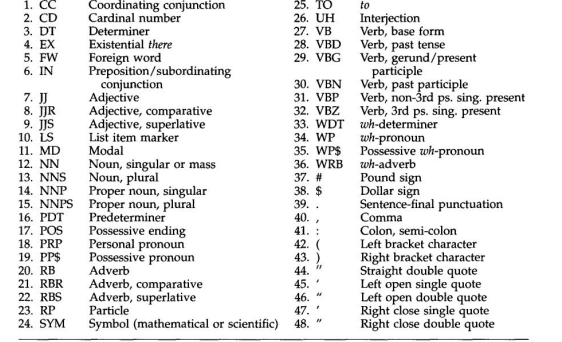

In [9]:
# nltk.help.upenn_tagset('RB')
# nltk.help.upenn_tagset('NNP')

In [10]:
text = " You are learning NLP for the first time."
nltk.pos_tag(text.split())

[('You', 'PRP'),
 ('are', 'VBP'),
 ('learning', 'VBG'),
 ('NLP', 'NNP'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('time.', 'NN')]

In [11]:
spacy_nlp = spacy.load('en_core_web_sm')
text = spacy_nlp("She saw a bear. She was very afraid.")
for word in text:
    print(word, word.pos_)

She PRON
saw VERB
a DET
bear NOUN
. PUNCT
She PRON
was AUX
very ADV
afraid ADJ
. PUNCT


In [12]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in text]
pd.DataFrame(spacy_pos_tagged, columns=["Word", "POS Tag", "Tag Type"])

,Word,POS Tag,Tag Type
0,She,PRP,PRON
1,saw,VBD,VERB
2,a,DT,DET
3,bear,NN,NOUN
4,.,.,PUNCT
5,She,PRP,PRON
6,was,VBD,AUX
7,very,RB,ADV
8,afraid,JJ,ADJ
9,.,.,PUNCT


### 1.5 Lemmatisation

In [13]:
def lemmatise_text(text):
    word_net_lemmatiser = WordNetLemmatizer()
    return ' '.join([word_net_lemmatiser.lemmatize(word) for word in text.split()])

lemmatise_text("David wanted to go with Alfa but went with Charlie so David is going with Bravo.")

'David wanted to go with Alfa but went with Charlie so David is going with Bravo.'

In [14]:
print("Lemmatisation with POS Specification")

word_net_lemmatiser = WordNetLemmatizer()

wordnet_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV
}

def lemmatise_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([word_net_lemmatiser.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

text = "David wanted to go with Alfa but went with Charlie so David is going with Bravo."
lemmatise_words(text)

Lemmatisation with POS Specification


'David want to go with Alfa but go with Charlie so David be go with Bravo.'

## 2. Eliminate unessential items from text

### 2.1 Removal of spaces.

In [15]:
text = "Converting line with            many spaces   ."
text = re.sub(r' +', " ", text)
text

'Converting line with many spaces .'

### 2.2 Removing digits.

In [16]:
text = "I've got 10 red candies and 5 blue candies."
text = re.sub(r'[0-9]', '', text)
text

"I've got  red candies and  blue candies."

### 2.3 Removing stopword.

In [17]:
stopwords.words('english')[:5]

['a', 'about', 'above', 'after', 'again']

In [18]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english')) # stop_words contains all english stopwords.
    filtered_sentence = []
    for word in text.split():
        if word not in stop_words:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)

text = "Stopwords is one of the most important topics."
remove_stopwords(text)

'Stopwords one important topics.'

### 2.4 Removing punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
text = 'This ** statement con_tains so: many punctuations. Maybe 5👍'
print('''str.maketrans(x, y, z) creates a translation table for str.translate().
The three arguments are:
x (first argument): Characters to replace (empty string '' means no replacement).
y (second argument): Characters to replace with (empty '' means no replacement).
z (third argument): Characters to delete (here, string.punctuation, which contains all punctuation marks).\n''')
text.translate(str.maketrans('', '', string.punctuation))

str.maketrans(x, y, z) creates a translation table for str.translate().
The three arguments are:
x (first argument): Characters to replace (empty string '' means no replacement).
y (second argument): Characters to replace with (empty '' means no replacement).
z (third argument): Characters to delete (here, string.punctuation, which contains all punctuation marks).



'This  statement contains so many punctuations Maybe 5👍'

In [21]:
print("Another way to remove puncuations.")
text = 'This ** statement con_tains so: many punctuations. Let us try 1 more 👍'
print('''
[^\w\s]:
\w → Matches word characters (letters, digits, underscores).
\s → Matches whitespace characters (spaces, tabs, newlines).
^ → Negates the set (matches characters not in \w or \s).
''')
re.sub(r'[^\w\s]', '', text)

Another way to remove puncuations.

[^\w\s]:
\w → Matches word characters (letters, digits, underscores).
\s → Matches whitespace characters (spaces, tabs, newlines).
^ → Negates the set (matches characters not in \w or \s).



'This  statement con_tains so many punctuations Let us try 1 more '

### 2.5 Removing URLs

In [22]:
text = "Shall I search the answer in www.google.com ?"
re.sub(r"https?://\S+|www\.\S+", "", text)

'Shall I search the answer in  ?'

In [23]:
text = "Shall I search the answer in https://www.google.com ?"
re.sub(r"https?://\S+|www\.\S+", "", text)

'Shall I search the answer in  ?'

### 2.6 Removing accented characters

In [24]:
def remove_accented_characters(text):
    text = unicodedata.normalize("NFKD", text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [25]:
remove_accented_characters('Sómě Áccěntěd těxt')

'Some Accented text'

In [26]:
unicodedata.normalize("NFKD", 'Sómě Áccěntěd těxt')

'Sómě Áccěntěd těxt'

## 3. Removing Emojis

In [27]:
text = "He's 😳"
emoji.demojize(text)

"He's :flushed_face:"

## 4. Web Scrapping

In [28]:
url = "https://www.npr.org/sections/news"

response = requests.get(url)
response.status_code

200

In [29]:
response.content[:100]

b'<!doctype html><html class="no-js" lang="en"><head><!-- OneTrust Cookies Consent Notice start for np'

In [30]:
soup = BeautifulSoup(response.content, "html.parser")
# soup

In [31]:
headlines = []
summaries = []

for article in soup.find_all('article'):
    headline = article.find('h2')
    summary = article.find('p')
    
    if headline:
        headlines.append(headline.get_text())
    if summary:
        summaries.append(summary.get_text())
        
news_df = pd.DataFrame({
    'Headlines': headlines,
    'Summary': summaries
})

display(news_df.head(2))
display(news_df.tail(2))

,Headlines,Summary
0,A deadly explosion outside a California fertil...,\n A damaged building is seen a...
1,SNL's 50th season proved it's still relevant. ...,\n On Saturday Night Live's col...


,Headlines,Summary
22,More than 100 Palestinians are killed in Gaza ...,\n People surround the bodies o...
23,DOJ may drop case against Boeing over deadly 7...,\n Relatives of victims hold a ...


## 5. Named Entity Recognition

In [32]:
nlp = en_core_web_sm.load()

text = '''European authorities fined Google a record $5.1 billion on Wednesday for 
abusing its power in the mobile phone market and ordered the company to alter its practices'''

doc = nlp(text)
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


##### Named Entity Recognition Usage

In [33]:
text ='''Python is an interpreted, high-level and general-purpose programming language 
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation."
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects'''
print(text)

Python is an interpreted, high-level and general-purpose programming language 
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation."
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects


In [34]:
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Python is an interpreted, high-level and general-purpose programming language 
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation., "
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects]


In [35]:
for token in doc:
    print(token.text[:10])

Python
is
an
interprete
,
high
-
level
and
general
-
purpose
programmin
language

       
Pythons
design
philosophy
emphasizes
code
readabilit
with
"

       
its
notable
use
of
significan
indentatio
.
"

       
Its
language
constructs
and
object
-
oriented
approach
aim
to
"

       
help
programmer
write
clear
and
"

       
logical
code
for
small
and
large
-
scale
projects


In [36]:
displacy.render(doc, style='ent', jupyter=True)

##### Dependency parsing

In [37]:
text = '''Barack Obama is an American politician who served as the 44th President of the United States 
from 2009 to 2017.He is the first African American to have served as president, 
as well as the first born outside the contiguous United States. He speaks English.'''

doc3 = nlp(text)
displacy.render(doc3, style="ent", jupyter=True)

In [38]:
doc = nlp('She saw a bear. She was very afraid.')
displacy.render(doc, style="dep", jupyter=True)

In [39]:
displacy.render(doc3, style="dep", jupyter=True)

## 6. Word Cloud

In [40]:
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = stopwords.words('english'))

text = '''Barack Obama is an American politician who served as the 44th President of the United States 
from 2009 to 2017.He is the first African American to have served as president, 
as well as the first born outside the contiguous United States. He speaks English.'''

wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

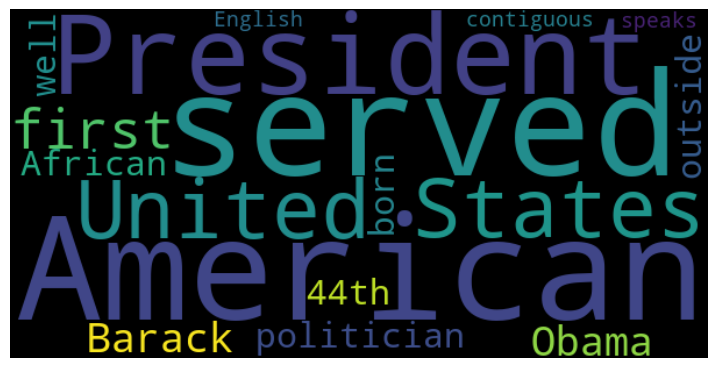

In [41]:
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 7. Sentiment Analysis using text blob.

In [42]:
text = "I love the music. Not any genre or artist in particular. But anything that pleases my ear, is good to go."
text_blob = TextBlob(text)

In [43]:
print("Fetching the text sentiment polarity", text_blob.sentiment.polarity)

Fetching the text sentiment polarity 0.45555555555555555


In [44]:
print("Fetching the text sentiment subjectivity", text_blob.sentiment.subjectivity)

Fetching the text sentiment subjectivity 0.5111111111111112


In [45]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive" 
    
print("Analysis of sentiment based on polarity:", getTextAnalysis(text_blob.sentiment.polarity))

Analysis of sentiment based on polarity: Positive
